In [86]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

## image reading from file OPENCV(BGR)  MATPLOTLIB(RGB) PILLOW(RGB)

In [87]:
# 图片读取用cv2.imread
img_ori = cv2.imread('lenna.jpg',1)
img_ori.shape

(500, 500, 3)

In [4]:
#cv2.imshow可以打印图片
cv2.imshow('lenna_photo',img_ori)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

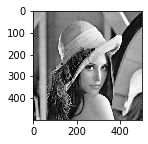

In [10]:
#plt也可以打印图片，但要注意是否为灰度图，以及通道顺序
plt.figure(figsize=(2,2))
plt.imshow(img_ori,cmap='gray')
plt.show()

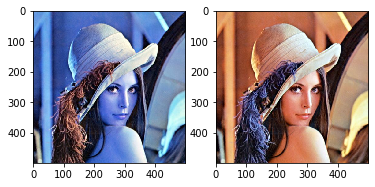

In [12]:
#subplot子图的使用，感兴趣可以了解一下
plt.subplot(121)#1行2列，这是第1个
plt.imshow(img_ori)
plt.subplot(122)#1行2列，这是第2个，有兴趣可以改着玩
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

# image crop

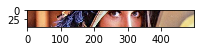

In [23]:
my_show(img_ori[150:300][100:200])  #numpy基本操作

# channel split

In [ ]:
## 图像通道的分别处理

In [24]:
B,G,R = cv2.split(img_ori)

In [26]:
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [27]:
# 对不同通道进行函数关系映射
def img_cooler(img,b_increase,r_decrease):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B>b_lim] = 255
    B[B<=b_lim] = (b_increase + B[B<=b_lim]).astype(img.dtype)
    
    r_lim = r_decrease
    R[R<r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

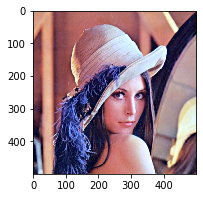

In [30]:
cooler_image = img_cooler(img_ori,30,10)
my_show(cooler_image)

## Gamma Change

In [31]:
# Look Up Table效率很高
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)

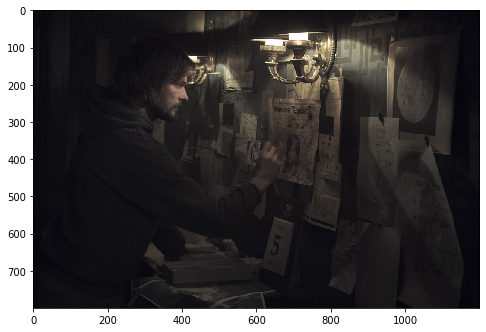

In [34]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(8,8))

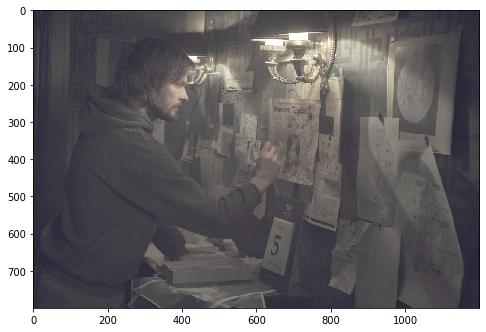

In [39]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(8,8))

# 直方图均衡

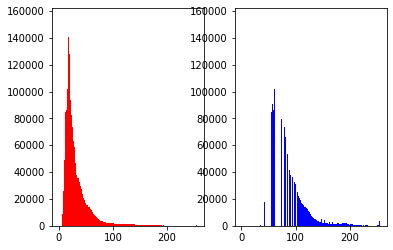

In [42]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.show()

## YUV 色彩空间的Y 进行直方图均衡 来调亮图片

In [53]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV) # BGR转YUV
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # 对Y通道单独进行调整
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR) # YUV转BGR

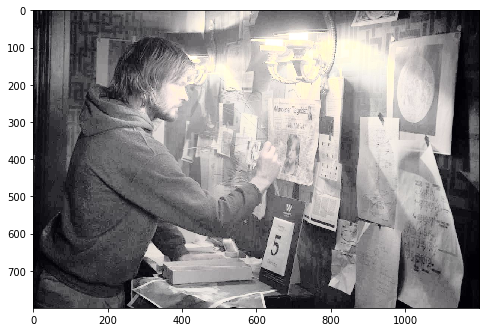

In [54]:
my_show(img_output,size=(8,8))

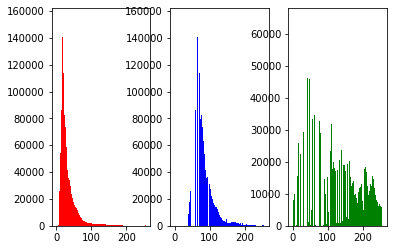

In [56]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

# transform

In [57]:
## perspective transform

In [76]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])  # 源点创建
pts2 = np.float32([[5,19],[19,460],[460,9],[410,420]])  # 目标点创建

M = cv2.getPerspectiveTransform(pts1,pts2)  # 计算得到单应性矩阵
img_warp = cv2.warpPerspective(img_ori,M,(500,500))  # 通过得到的矩阵对图片进行变换

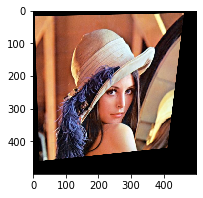

In [73]:
my_show(img_warp)

In [88]:
# rotation
img = img_ori
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

##############################
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

############################
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]
[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]
[[  0.4330127    0.25        79.24682453]
 [ -0.25         0.4330127  204.24682453]]


## 膨胀和腐蚀

In [77]:
img_writing = cv2.imread('libai.png',0)

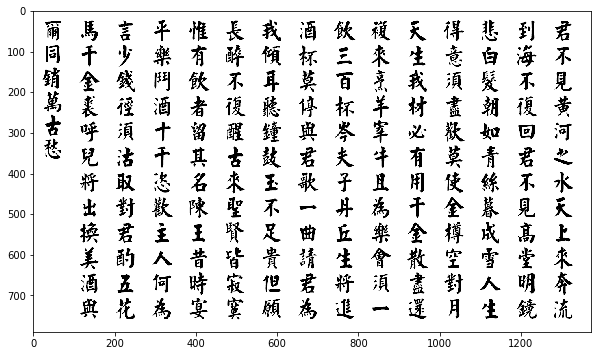

In [80]:
plt.figure(figsize=(10,8))
plt.imshow(img_writing,cmap='gray')
plt.show()

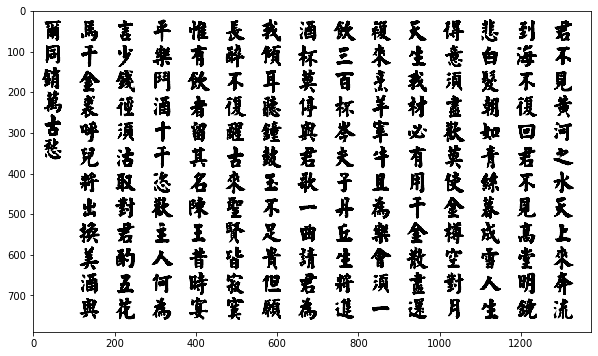

In [81]:
erode_writing = cv2.erode(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(erode_writing,cmap='gray')
plt.show()

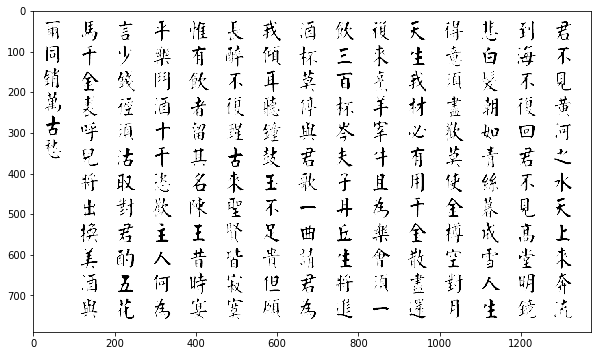

In [84]:
dilate_writing = cv2.dilate(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(dilate_writing,cmap='gray')
plt.show()